## OUTLINE FOR FOLLOWING CODE SECTIONS
    
### (1) final list of materials with dataframes and deletion of "anomalous" materials
### (2) Graphs of final list of materials
### (3) How materials that fit linear trends seen in FeO were extracted from the MPD
         *(3) is listed last as it was desired to list results first. (3) is more procedural

In [20]:
# Accesing the API and loading packages
import pymatgen as pmg
from pymatgen import MPRester
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from operator import *
from itertools import combinations as combo
from scipy import stats
api_key= "enter key here" # <--- your key in the blank 
mpr = pmg.MPRester(api_key)

#preparting dataframe and seaborn settings
pd.set_option('display.max_rows', None)
sns.set()
sns.set_theme()

### (1) The following code is meant to display the final set of materials along with essential graphs.

In [21]:
data = pd.read_excel(r'part2data.xlsx')
data_list = data.to_dict('records')

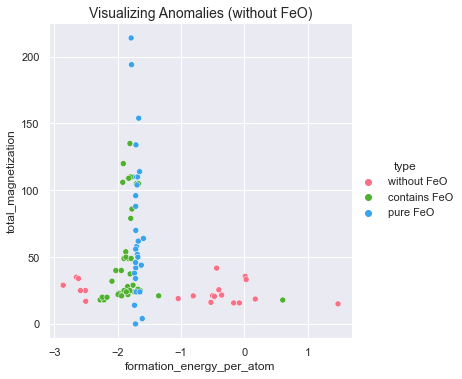

Materials in pink (all do not contain FeO) deviate in formation_energy and will be filtered in the subsequent code


In [22]:
#graph with "anomalous" materials needing to be filtered in the subsequent code

for i in data_list:
    if i['type'] == 'anomaly?':
        i['type'] = 'without FeO'
    elif i['type'] == 'database':
        i['type'] = 'contains FeO'
    elif i['type'] == 'FeO':
        i['type'] = 'pure FeO'
data = pd.DataFrame(data_list)

sns.color_palette("husl", 8)
g = sns.relplot(data=data,  x="formation_energy_per_atom", y="total_magnetization", palette="husl", hue = 'type')
plt.xlim(None)
plt.ylim(None)
plt.title("Visualizing Anomalies (without FeO)", fontsize=14)
plt.show()
print('Materials in pink (all do not contain FeO) deviate in formation_energy and will be filtered in the subsequent code')

In [23]:
#filtering anomalous materials and finding REAL synthesized compounds in the final list
#displays dataframe of materials found in the CSD
check1 = 0
check2 = 0
cleanlist= []
real =[]
anomalies = []

for i in data_list:
    if i['type'] != 'without FeO':
        cleanlist.append(i)
        check1 += 1
    else:
        check1 += 0
df = pd.DataFrame(cleanlist)

for j in cleanlist:
    if j['icsd_ids'] != '[]':
        real.append(j)
realdf = pd.DataFrame(real)

for l in data_list:
    if l['type'] == 'without FeO':
        anomalies.append(l)
anomdf = pd.DataFrame(anomalies)
        
print("total number of materials in final list/df: " + str(len(cleanlist)))
print("number of REAL materials in df: " + str(len(real)))
print("number of anomalies (w/out iron oxide) removed from original list: " + str(len(data_list)-check1))
print()
print('below is a dataframe of all compounds in the final list with an icsd_id. They have been synthesized and can be found in the Cambridge Structural Database (CSD)')
display(realdf[['pretty_formula', 'type', 'icsd_ids', 'energy', 'energy_per_atom', 'volume', 'formation_energy_per_atom', 'nsites', 'nelements', 'e_above_hull', 'band_gap', 'density', 'total_magnetization']])
print()
print('This second df has the materials removed b/c of "anomaly?". None contain iron oxide and deviate in formation_energy_per_atom')
display(anomdf[['pretty_formula', 'type', 'icsd_ids', 'energy', 'energy_per_atom', 'volume', 'formation_energy_per_atom', 'nsites', 'nelements', 'e_above_hull', 'band_gap', 'density', 'total_magnetization']])

total number of materials in final list/df: 73
number of REAL materials in df: 8
number of anomalies (w/out iron oxide) removed from original list: 26

below is a dataframe of all compounds in the final list with an icsd_id. They have been synthesized and can be found in the Cambridge Structural Database (CSD)


,pretty_formula,type,icsd_ids,energy,energy_per_atom,volume,formation_energy_per_atom,nsites,nelements,e_above_hull,band_gap,density,total_magnetization
0,BaYbFe4O7,contains FeO,[251000],-85.388487,-6.568345,186.885693,-2.250937,13,4,0.043238,0.1994,5.737631,18.000001
1,Ca2Fe7O11,contains FeO,[100827],-132.673067,-6.633653,217.694703,-2.090021,20,3,0.061857,0.3267,4.935700,32.000293
2,Ca2Fe9O13,contains FeO,[100826],-159.534505,-6.647271,266.066119,-2.029021,24,3,0.052156,0.0000,4.935151,40.000248
3,BaCa(FeO2)4,contains FeO,[15174],-92.354721,-6.596766,206.821987,-2.251196,14,4,0.032707,0.0000,4.245488,19.999589
4,BaYbFe4O7,contains FeO,[251004],-85.724711,-6.594209,188.585491,-2.276800,13,4,0.017375,0.3872,5.685915,17.999909
5,BaSr(FeO2)4,contains FeO,"[37011, 1943, 1838]",-91.887130,-6.563366,220.005985,-2.240376,14,4,0.023438,0.6393,4.349907,20.000000
6,Fe5O7,pure FeO,[430563],-78.896488,-6.574707,121.726015,-1.707646,12,2,0.169525,0.0000,5.336882,23.997880
7,Fe13O19,pure FeO,[238770],-206.253393,-6.445419,312.890144,-1.593892,32,2,0.301966,0.0000,5.466172,63.999471



This second df has the materials removed b/c of "anomaly?". None contain iron oxide and deviate in formation_energy_per_atom


,pretty_formula,type,icsd_ids,energy,energy_per_atom,volume,formation_energy_per_atom,nsites,nelements,e_above_hull,band_gap,density,total_magnetization
0,Eu3Zn2(CuP2)2,without FeO,[89516],-72.124728,-6.556793,217.968296,-0.807044,11,4,0.000516,0.0000,6.381794,21.001651
1,Mn6OF11,without FeO,[],-116.248531,-6.458252,240.534649,-2.860545,18,3,0.033716,0.0000,3.828770,29.001676
2,LiMn5O3F5,without FeO,[],-94.227716,-6.730551,186.198772,-2.505229,14,4,0.085615,0.5714,3.786816,25.000008
3,Mn6OF11,without FeO,[],-116.243455,-6.457970,240.346677,-2.860263,18,3,0.033998,0.3835,3.831764,29.006719
4,LiMn7(OF3)3,without FeO,[],-132.822479,-6.641124,263.888677,-2.651172,20,4,0.059987,1.3878,3.841561,35.006887
5,Mn7(OF3)3,without FeO,[],-127.639562,-6.717872,260.424623,-2.618392,19,3,0.097577,0.6512,3.848402,33.999775
6,Cr7Se8,without FeO,[26977],-101.597575,-6.773172,294.595213,-0.403930,15,2,0.064685,0.0000,5.612176,25.558520
7,Mn6OF11,without FeO,[],-116.264687,-6.459149,241.044036,-2.861443,18,3,0.032819,0.0000,3.820678,29.003941
8,Ba2Eu3Si7,without FeO,[83676],-78.719469,-6.559956,311.256813,-0.502350,12,3,0.000000,0.0000,4.946268,21.178180
9,LiMn9Se10,without FeO,[],-128.105376,-6.405269,390.987983,-0.438960,20,3,0.000000,0.0000,5.482850,41.786220


In [24]:
#final list of materials that passed all conditions
num = 0
for i in cleanlist:
    if i['type'] == 'database':
        num +=1
for i in cleanlist:
    if i['icsd_ids'] != '[]':
        i['type'] = 'in icsd'
            
dfs = pd.DataFrame(cleanlist)
graphdf = dfs[['pretty_formula', 'type', 'icsd_ids', 'energy', 'energy_per_atom', 'volume', 'formation_energy_per_atom', 'nsites', 'nelements', 'e_above_hull', 'band_gap', 'density', 'total_magnetization']]        
print('Number of materials in final list (all contain iron oxide): ' + str(num) + '/' + str(len(cleanlist)) + ' | (FeO variations)/(#total mats)')
print()
print('Materials (total 31) that are not "FeO variations" contain strictly FeO but in different stoichiometric amounts')
showdf = dfs[['pretty_formula', 'type', 'icsd_ids', 'energy', 'energy_per_atom', 'volume', 'formation_energy_per_atom', 'nsites', 'nelements', 'e_above_hull', 'band_gap', 'density', 'total_magnetization']]
display(showdf)

Number of materials in final list (all contain iron oxide): 0/73 | (FeO variations)/(#total mats)

Materials (total 31) that are not "FeO variations" contain strictly FeO but in different stoichiometric amounts


,pretty_formula,type,icsd_ids,energy,energy_per_atom,volume,formation_energy_per_atom,nsites,nelements,e_above_hull,band_gap,density,total_magnetization
0,BaYbFe4O7,in icsd,[251000],-85.388487,-6.568345,186.885693,-2.250937,13,4,0.043238,0.1994,5.737631,18.000001
1,MgFe11O18,contains FeO,[],-197.286017,-6.576201,317.549114,-1.871886,30,3,0.084084,0.0000,4.845353,54.000221
2,Fe23O32,pure FeO,[],-360.644314,-6.557169,576.599379,-1.687848,55,2,0.186604,0.0096,5.173468,109.999963
3,LiFe5O8,contains FeO,[],-90.006046,-6.429003,140.400183,-1.817622,14,3,0.136524,1.1991,4.898362,24.999894
4,Fe13O15,pure FeO,[],-186.291713,-6.653275,303.683389,-1.715198,28,2,0.076544,0.0000,5.281951,55.999854
5,LiZn(Fe5O8)2,contains FeO,[],-179.774611,-6.420522,315.125058,-1.832326,28,4,0.081214,0.0000,4.672907,48.999215
6,Mg2Fe9O13,contains FeO,[],-156.651763,-6.527157,255.922828,-1.942683,24,3,0.091346,0.5643,4.926068,40.000683
7,BaCa(Fe12O19)2,contains FeO,[],-425.257236,-6.644644,729.713631,-1.911078,64,4,0.078425,1.0236,4.837165,120.000076
8,Ca2Fe7O11,in icsd,[100827],-132.673067,-6.633653,217.694703,-2.090021,20,3,0.061857,0.3267,4.935700,32.000293
9,Ca2(Fe2O3)11,contains FeO,[],-379.755732,-6.662381,655.496995,-1.919705,57,3,0.066968,0.0000,4.652890,105.999688


### (2) Seaborn plots of final data list that exhibit the most prominent linear trends

*energy per atom and energy above hull may not appear vertically linear but this is caused by the narrow margin for  their respective x-axis values. Margins were not altered for precision


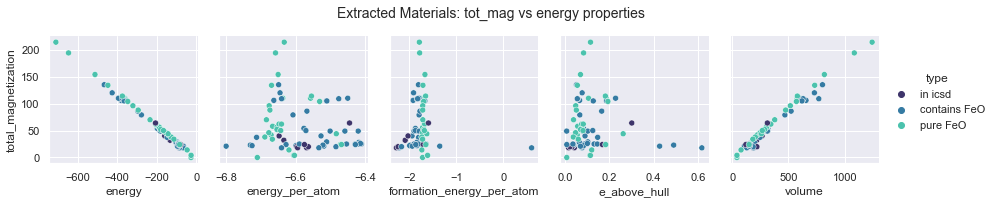

In [25]:
#General plot to visualize all trends
x_vars = ['energy', 'energy_per_atom', 'formation_energy_per_atom', 'e_above_hull', 'volume']
y_vars = ['total_magnetization']
g=sns.PairGrid(graphdf, hue= "type", palette="mako", x_vars=x_vars, y_vars=y_vars)
g.map(sns.scatterplot)
g.add_legend()
g.fig.suptitle("Extracted Materials: tot_mag vs energy properties", fontsize=14, y = 1.1)
print('*energy per atom and energy above hull may not appear vertically linear but this is caused by the narrow margin for  their respective x-axis values. Margins were not altered for precision')

Text(0.5, 1, 'Linear Regression With Bounds')

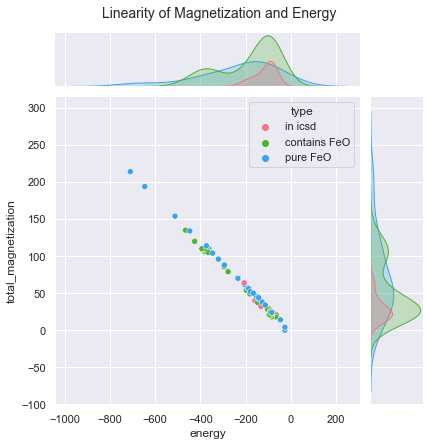

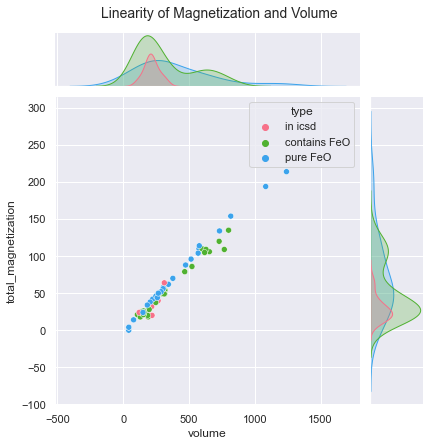

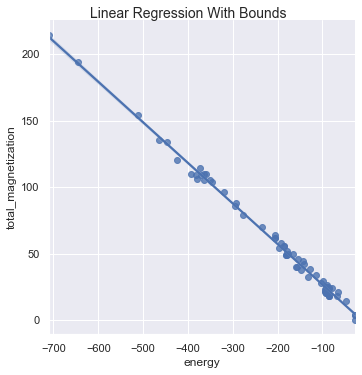

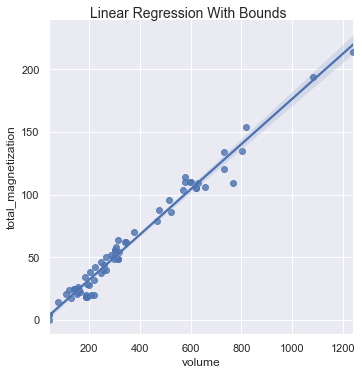

In [26]:
#2 representations of the 2 linear trends seen in the data

#Joint grids of Linear Trends
sns.color_palette("husl", 9)
sns.set_style("darkgrid")
g = sns.jointplot(data=graphdf, x="energy", y="total_magnetization", hue= "type", palette = 'husl')
fig = g.fig 
fig.suptitle("Linearity of Magnetization and Energy", fontsize=14, y = 1.03)

sns.color_palette("husl", 9)
sns.set_style("darkgrid")
g = sns.jointplot(data=graphdf, x="volume", y="total_magnetization", hue= "type", palette = 'husl')
fig = g.fig 
fig.suptitle("Linearity of Magnetization and Volume", fontsize=14, y = 1.03)

#linear regressions of linear trends
lm=sns.lmplot(data=graphdf,  x="energy", y="total_magnetization", palette="husl")
fig = lm.fig 
fig.suptitle("Linear Regression With Bounds", fontsize=14, y = 1)

lm=sns.lmplot(data=graphdf,  x="volume", y="total_magnetization", palette="husl")
fig = lm.fig 
fig.suptitle("Linear Regression With Bounds", fontsize=14, y = 1)

Graphs listed in order of most precise vertical trend to least (values are concentrated in a single region for more  precise vertical trends).

First two are the most significant to this study


Text(0.5, 1.0, 'band_gap Distribution')

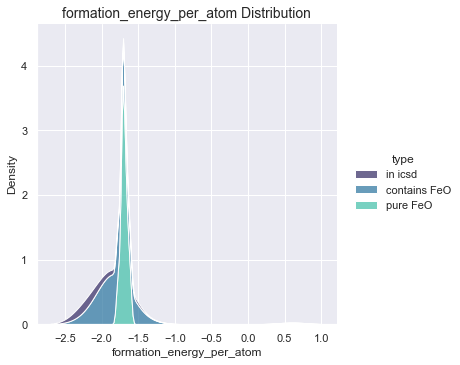

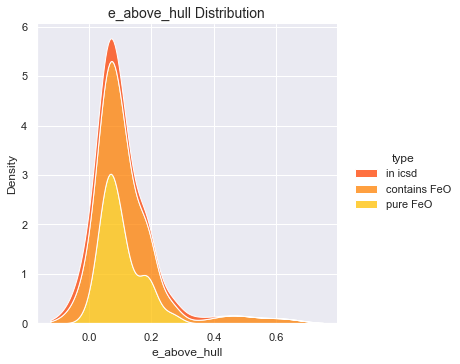

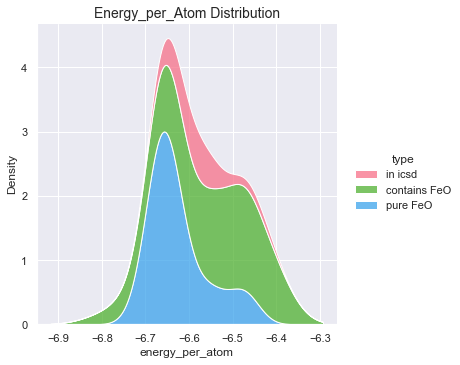

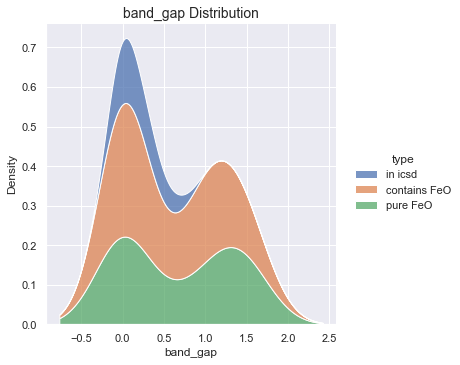

In [27]:
#Vertical Trends: all the energies with kernel density graphs- indicators of just how vertical the trends are

print('Graphs listed in order of most precise vertical trend to least (values are concentrated in a single region for more  precise vertical trends).') 
print()
print('First two are the most significant to this study')
sns.displot(data=graphdf, x="formation_energy_per_atom", hue="type", multiple="stack", kind="kde", palette= "mako")
plt.title("formation_energy_per_atom Distribution", fontsize = 14)
sns.displot(data=graphdf, x="e_above_hull", hue="type", multiple="stack", kind="kde", palette= "autumn")
plt.title("e_above_hull Distribution", fontsize = 14)
sns.displot(data=graphdf, x="energy_per_atom", hue="type", multiple="stack", kind="kde", palette= "husl")
plt.title("Energy_per_Atom Distribution", fontsize = 14)
sns.displot(data=graphdf, x="band_gap", hue="type", multiple="stack", kind="kde")
plt.title("band_gap Distribution", fontsize = 14)

### (3) The following code displays how materials were fit to the FeO trend.

### Part A: Generating FeO Materials

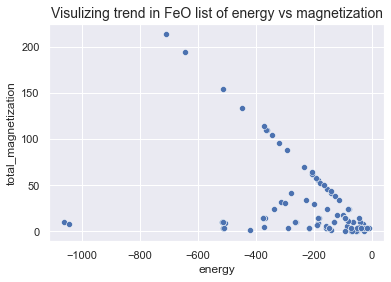

all FeO materials in the MPD: List of 134 materials


,pretty_formula,total_magnetization,energy,e_above_hull,energy_per_atom,formation_energy_per_atom,nsites,type,trend
0,Fe10O11,4.199996e+01,-140.075443,0.055957,-6.670259,-1.714428,21,FeO,no
1,Fe11O12,4.599935e+01,-153.565623,0.048824,-6.676766,-1.717847,23,FeO,no
2,Fe2O3,9.999991e+00,-65.811499,0.168127,-6.581150,-1.738944,10,FeO,no
3,Fe32O35,1.339965e+02,-446.821187,0.056814,-6.668973,-1.711021,67,FeO,no
4,Fe2O3,9.999988e+00,-266.883956,0.077178,-6.672099,-1.829893,40,FeO,no
5,FeO,4.000010e+00,-158.585826,0.111268,-6.607743,-1.616403,24,FeO,no
6,FeO2,2.457408e+00,-26.112613,1.979907,-4.352102,0.390681,6,FeO,no
7,Fe23O32,1.100000e+02,-360.644314,0.186604,-6.557169,-1.687848,55,FeO,no
8,FeO2,4.000803e+00,-36.087597,0.317409,-6.014599,-1.271816,6,FeO,no
9,Fe2O3,9.874985e+00,-515.476424,0.305821,-6.443455,-1.601249,80,FeO,no


In [24]:
#Generating FeO data for linear trend
#Function to search MPD with MPRester
def search(name, criteria):
    properties = ['energy', 'energy_per_atom', 'volume', 'formation_energy_per_atom', 'nsites', 'unit_cell_formula', 'pretty_formula', 'is_hubbard', 'elements', 'nelements', 'e_above_hull', 'hubbards', 'is_compatible', 'spacegroup', 'task_ids', 'band_gap', 'density', 'icsd_id', 'icsd_ids', 'cif', 'total_magnetization', 'material_id', 'oxide_type', 'tags', 'elasticity']
    new_list = MPRester(api_key).query(criteria, properties)
    
    for i in range(0, len(new_list)):
        new_list[i]["type"] = name
        new_list[i]["trend"] = 'no'
        
    return new_list

#dataframe and scatterplot of all FeO materials
FeO = search('FeO',{"elements":{"$all": ["Fe", "O"]}, "nelements":2})
pdFeO = pd.DataFrame(FeO)

sns.scatterplot(data=pdFeO, x='energy', y='total_magnetization')
plt.title('Visulizing trend in FeO list of energy vs magnetization', fontsize = 14)
plt.show()

print("all FeO materials in the MPD: List of " + str(len(FeO)) + " materials")
displayFeO = pdFeO[['pretty_formula','total_magnetization','energy', 'e_above_hull', 'energy_per_atom','formation_energy_per_atom','nsites', 'type', 'trend']]
display(displayFeO)

### Part B: Generating Linear Regression and Extracting FeO materials from FeO list

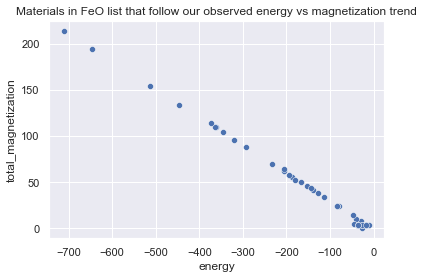

,energy,energy_per_atom,volume,formation_energy_per_atom,nsites,unit_cell_formula,pretty_formula,is_hubbard,elements,nelements,...,icsd_ids,cif,total_magnetization,material_id,oxide_type,tags,elasticity,type,trend,delta
0,-140.075443,-6.670259,224.473967,-1.714428,21,"{'Fe': 10.0, 'O': 11.0}",Fe10O11,True,"[Fe, O]",2,...,[],# generated using pymatgen\ndata_Fe10O11\n_sym...,41.999961,mp-759504,oxide,[],None,FeO,yes,1.085482
1,-153.565623,-6.676766,248.995284,-1.717847,23,"{'Fe': 11.0, 'O': 12.0}",Fe11O12,True,"[Fe, O]",2,...,[],# generated using pymatgen\ndata_Fe11O12\n_sym...,45.999348,mp-705417,oxide,[],None,FeO,yes,1.120693
2,-446.821187,-6.668973,732.293795,-1.711021,67,"{'Fe': 32.0, 'O': 35.0}",Fe32O35,True,"[Fe, O]",2,...,[],# generated using pymatgen\ndata_Fe32O35\n_sym...,133.996515,mp-863766,oxide,[],None,FeO,yes,0.829431
3,-26.112613,-4.352102,82.376012,0.390681,6,"{'Fe': 2.0, 'O': 4.0}",FeO2,True,"[Fe, O]",2,...,[],# generated using pymatgen\ndata_FeO2\n_symmet...,2.457408,mvc-10966,oxide,[],"{'G_Reuss': -20.0, 'G_VRH': -9.0, 'G_Voigt': 3...",FeO,yes,6.544408
4,-360.644314,-6.557169,576.599379,-1.687848,55,"{'Fe': 23.0, 'O': 32.0}",Fe23O32,True,"[Fe, O]",2,...,[],# generated using pymatgen\ndata_Fe23O32\n_sym...,109.999963,mp-774295,oxide,[],None,FeO,yes,0.947511
5,-36.087597,-6.014599,74.098999,-1.271816,6,"{'Fe': 2.0, 'O': 4.0}",FeO2,True,"[Fe, O]",2,...,[],# generated using pymatgen\ndata_FeO2\n_symmet...,4.000803,mvc-11541,oxide,[],None,FeO,yes,7.984298
6,-186.291713,-6.653275,303.683389,-1.715198,28,"{'Fe': 13.0, 'O': 15.0}",Fe13O15,True,"[Fe, O]",2,...,[],# generated using pymatgen\ndata_Fe13O15\n_sym...,55.999854,mp-756693,oxide,[],None,FeO,yes,0.907799
7,-37.136272,-6.189379,63.253685,-1.446595,6,"{'Fe': 2.0, 'O': 4.0}",FeO2,True,"[Fe, O]",2,...,[],# generated using pymatgen\ndata_FeO2\n_symmet...,4.016227,mp-850222,oxide,[],None,FeO,yes,8.282509
8,-346.148196,-6.531098,570.057574,-1.694520,53,"{'Fe': 21.0, 'O': 32.0}",Fe21O32,True,"[Fe, O]",2,...,[],# generated using pymatgen\ndata_Fe21O32\n_sym...,104.001561,mp-530048,oxide,[],None,FeO,yes,0.715440
9,-127.075622,-6.688191,205.633518,-1.736097,19,"{'Fe': 9.0, 'O': 10.0}",Fe9O10,True,"[Fe, O]",2,...,[],# generated using pymatgen\ndata_Fe9O10\n_symm...,38.000745,mp-759037,oxide,[],None,FeO,yes,1.196754


In [25]:

#fit_puller function used to fit all data to linear trend
def fit_puller(frame,prop,slope,intercept,bound):
    checked=[]
    listy=frame.to_dict('records')
    
    for n in listy:
        delta = np.absolute(n['total_magnetization']-(slope*n[prop]+intercept))
        n['delta'] = delta
        if n['delta']<=bound:
            n['trend'] = 'yes'
            checked.append(n)
    output=pd.DataFrame(checked)
    return output

#extracting higher tot mag values to yield a more precise linear regression
high_values = []
for i in FeO:
    if i['total_magnetization'] > 100:
        high_values.append(i)
frame2 = pd.DataFrame(high_values)

#pulling materials from linear regression. Stats used to find all parameters/values of linear regression (e.g slope)
e_info=stats.linregress(frame2['energy'], frame2['total_magnetization'])
e_pull=fit_puller(pdFeO,'energy',e_info.slope,e_info.intercept,10)

sns.scatterplot(data=e_pull, x='energy', y='total_magnetization')
plt.title('Materials in FeO list that follow our observed energy vs magnetization trend')
plt.show()
display(e_pull)

### Part C: Fitting ALL materials in the MPD (with tot mag>15) to our trend
#### THE FOLLOWING CELL IS NOT MEANT TO BE RUN. 
##### Because 6207 materials are generated from this search, sample code of how these materials were searched and the list distilled/ edited with constraints is given instead. *if you wish to run the cell remove the # next to full_list- however, as mentioned before, it is an extensive search. The section marked with #***** is the portion that does not work properly because it is a sample constraint

In [ ]:
#DO NOT RUN CELL- shows bounds but for deleting outliers but further sections are samples and do not run properly.
    #including data to make this cell run would clutter this codesheet- instead we would like to provide an overview

# Functions to add another MPRester search to the FeO material list
def Merge(dict1, dict2):
    merged = [*dict1, *dict2]
    return merged

def append_mat(name, criteria, material):
    properties = ['energy', 'energy_per_atom', 'volume', 'formation_energy_per_atom', 'nsites', 'unit_cell_formula', 'pretty_formula', 'is_hubbard', 'elements', 'nelements', 'e_above_hull', 'hubbards', 'is_compatible', 'spacegroup', 'task_ids', 'band_gap', 'density', 'icsd_id', 'icsd_ids', 'cif', 'total_magnetization', 'material_id', 'oxide_type', 'tags', 'elasticity']
    new_list = MPRester(api_key).query(criteria, properties)
    
    for i in range(0, len(new_list)):
        new_list[i]["type"] = name
        new_list[i]["trend"] = 'no'
        
    material = Merge(new_list, material)
            
    return material
    
#adding on ALL compounds with Magnetization above 15- remove # below if you wish to see the list
#full_list = append_mat('database',{"total_magnetization": {"$gte": 15}}, FeO_list)
data = pd.DataFrame(full_list)
print("total amount of materials above 15 magnetization: "+str(len(full_list)-len(FeO_list)))
display(data)

#pulling data fitting linear regression
data_pull=fit_puller(data,'energy',e_info.slope,e_info.intercept,10)

sns.scatterplot(data=data_pull, x='energy', y='total_magnetization')
plt.title('Materials in database that follow our observed energy vs magnetization trend')
plt.show()

index = data_pull.index
n_rows = len(index)
print("Number of New Materials Added From Linear Regression: ", n_rows - len(FeO_list))
display(data_pull)

data_pull.to_excel(r'rename_file.xlsx', index = False) #adding excel file to store if desired

#***** constraints for deleting materials that didn't fit the energy per atom vertical trend
for i in dtapll_list:
    if i['energy_per_atom'] < -6.4:
        if i['energy_per_atom'] > -6.8:
            extract.append(i)